In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,r2_score,recall_score,plot_roc_curve
from sklearn.metrics import accuracy_score , f1_score , roc_auc_score,precision_score,matthews_corrcoef,mean_squared_error,mean_absolute_error
from sklearn.metrics import plot_confusion_matrix
from sklearn import linear_model, decomposition, datasets
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [ ]:
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")
df.describe()


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [ ]:
inputs = df.drop('DEATH_EVENT',axis='columns')
target = df.DEATH_EVENT

def Get_Features_types(data):
    categorical_features = []
    numerical_features = []
    for col in data.iloc[:,:-1]:
        if data[col].nunique() < 3:
            categorical_features.append(col)
        else : 
            numerical_features.append(col)
    return categorical_features , numerical_features

Get_Features_types(df)

categorical_features = Get_Features_types(df)[0]
numerical_features = Get_Features_types(df)[1]

print("Categorical Fields",categorical_features)
print("Numerical Fields",numerical_features)



Categorical Fields ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']
Numerical Fields ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']


# EDA

In [ ]:
inputs.columns[inputs.isna().any()]

Index([], dtype='object')

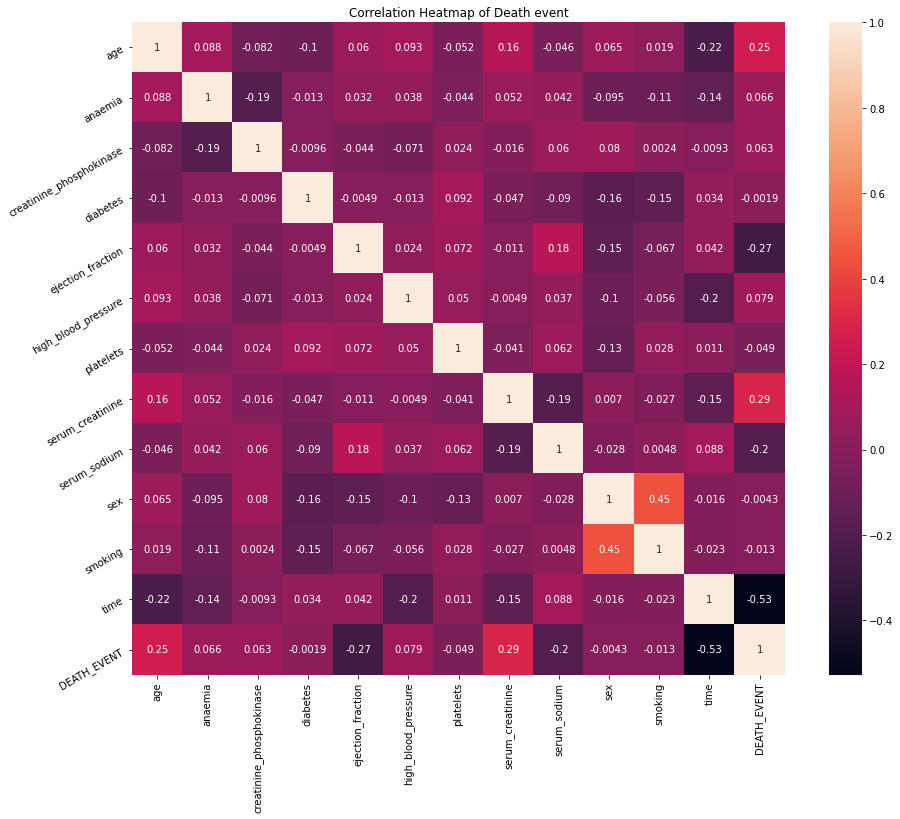

In [ ]:
correlation = df.corr()
plt.figure(figsize=(16,12))
plt.title('Correlation Heatmap of Death event')
ax = sns.heatmap(correlation, square=True, annot=True,  linecolor='black')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)           
plt.show()

In [ ]:
correlation[np.absolute(correlation['DEATH_EVENT']) > 0.5]['DEATH_EVENT']

time          -0.526964
DEATH_EVENT    1.000000
Name: DEATH_EVENT, dtype: float64

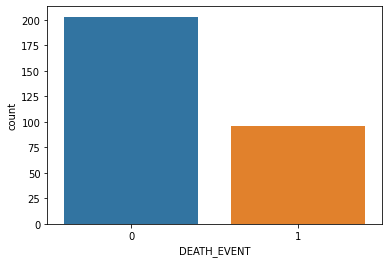

In [ ]:
sns.countplot( x = 'DEATH_EVENT' , data = df)

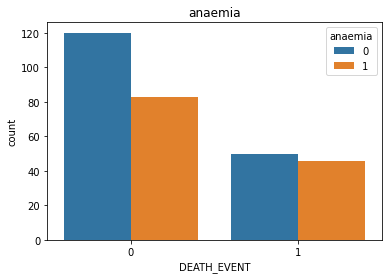

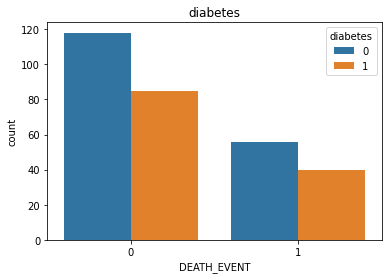

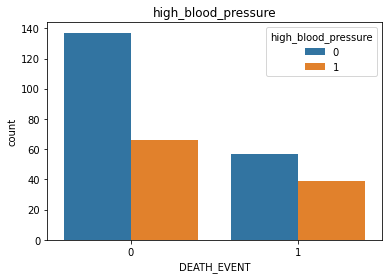

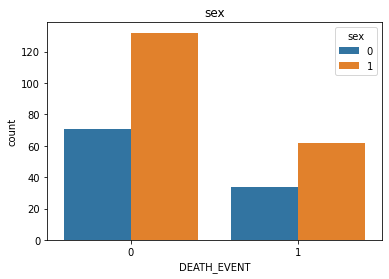

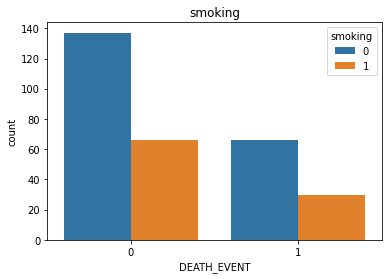

In [ ]:
def CountPlot_hue_Categorical_data(data):
    for feature in categorical_features:
        plt.figure()
        sns.countplot(x = "DEATH_EVENT" , data = data , hue=feature)
        plt.title(feature)

CountPlot_hue_Categorical_data(df)

In [ ]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs,target,test_size=0.3)

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
log_reg = LogisticRegression()

In [ ]:
log_reg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
logr_pred = log_reg.predict(X_test)

In [ ]:
accuracyLR = accuracy_score(y_test,logr_pred)
accuracyLR

0.7666666666666667

In [ ]:
log_reg = LogisticRegression()
grid = {"penalty" : ["l1", "l2"],"C" : np.arange(0,100,1)}
log_reg_cv = GridSearchCV(log_reg, grid, cv=3)
log_reg_cv.fit(X_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,...
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 

In [ ]:
print("Tuned hyperparameter n_estimators: {}".format(log_reg_cv.best_params_)) 
print("Best score: {}".format(log_reg_cv.best_score_))
print("Best Estimator: {}".format(log_reg_cv.best_estimator_))

Tuned hyperparameter n_estimators: {'C': 19, 'penalty': 'l2'}
Best score: 0.8611456176673569
Best Estimator: LogisticRegression(C=19, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [ ]:
results_NB = pd.DataFrame(log_reg_cv.cv_results_['params'])
results_NB['test_score'] = log_reg_cv.cv_results_['mean_test_score']
results_NB

,C,penalty,test_score
0,0,l1,NaN
1,0,l2,NaN
2,1,l1,NaN
3,1,l2,0.851553
4,2,l1,NaN
...,...,...,...
195,97,l2,0.856315
196,98,l1,NaN
197,98,l2,0.856315
198,99,l1,NaN


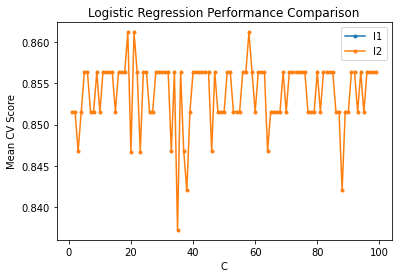

In [ ]:
#Performance Comparison for Logistics Regression
import matplotlib.pyplot as plt
for i in ['l1', 'l2']:
    temp = results_NB[results_NB['penalty'] == i]
    temp_average = temp.groupby('C').agg({'test_score': 'mean'})
    plt.plot(temp_average, marker = '.', label = i)
    
    
plt.legend()
plt.xlabel('C')
plt.ylabel("Mean CV Score")
plt.title("Logistic Regression Performance Comparison")
plt.show()



Accuracy:  0.7666666666666667
f1-score: 0.6440677966101694
Precision score:  0.7037037037037037
Recall score:  0.59375
MCC:  0.47613402785295084
Mean Squared Error: 0.48304589153964794
Mean Absolute Error: 0.48304589153964794


              precision    recall  f1-score   support

           0       0.79      0.86      0.83        58
           1       0.70      0.59      0.64        32

    accuracy                           0.77        90
   macro avg       0.75      0.73      0.74        90
weighted avg       0.76      0.77      0.76        90





Text(0.5, 1.0, 'Confusion Matrix')

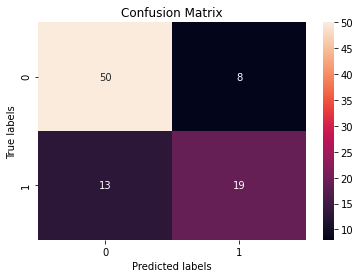

In [ ]:
model_LR = log_reg_cv.best_estimator_
model_LR.fit(X_train,y_train)
predictions_LR =  model_LR.predict(X_test)
print('\n')
print('Accuracy: ', accuracy_score(y_test,predictions_LR))
print('f1-score:', f1_score(y_test, predictions_LR))
print('Precision score: ', precision_score(y_test,predictions_LR))
print('Recall score: ', recall_score(y_test,predictions_LR))
print('MCC: ',matthews_corrcoef(y_test,predictions_LR) )
print('Mean Squared Error:', mean_squared_error(y_test, predictions_LR) ** 0.5)
print('Mean Absolute Error:', mean_absolute_error(y_test, predictions_LR) ** 0.5)
print('\n')
print(classification_report(y_test, predictions_LR))
print('\n')
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, predictions_LR), annot=True, ax = ax, fmt='g')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

In [ ]:
from sklearn.metrics import roc_curve, auc

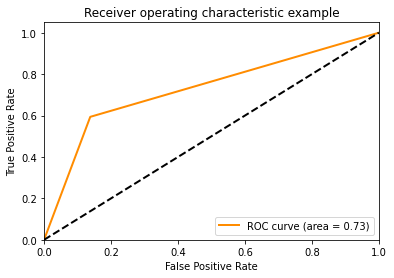

In [ ]:
clf = LogisticRegression()
model=log_reg.fit(X_train,y_train)
pred_val = log_reg.predict(X_test)

### Compute ROC curve and ROC area for predictions on validation set
fpr, tpr, _ = roc_curve(y_test, pred_val)
roc_auc = auc(fpr, tpr)

### Plot
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='black', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# Support Vector Machine

In [ ]:
y_predictfrom sklearn import svm

In [ ]:
model = svm.SVC(C = 0.8, kernel='rbf')
model.fit(X_train, y_train)
pred_val = model.predict(X_test)
print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, pred_val)))

Accuracy Score is 0.64444
    0  1
0  58  0
1  32  0


              precision    recall  f1-score   support

           0       0.64      1.00      0.78        58
           1       0.00      0.00      0.00        32

    accuracy                           0.64        90
   macro avg       0.32      0.50      0.39        90
weighted avg       0.42      0.64      0.51        90

Accuracy:  0.6444444444444445
f1-score: 0.0
Precision score:  0.0
Recall score:  0.0
MCC:  0.0
Mean Squared Error: 0.5962847939999439
Mean Absolute Error: 0.5962847939999439


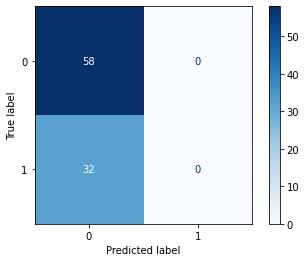

In [ ]:
from sklearn import metrics
print(classification_report(y_test, pred_val))
print('Accuracy: ', accuracy_score(y_test,pred_val))
print('f1-score:', f1_score(y_test, pred_val))
print('Precision score: ', precision_score(y_test,pred_val))
print('Recall score: ', recall_score(y_test,pred_val))
print('MCC: ',matthews_corrcoef(y_test,pred_val) )
print('Mean Squared Error:', mean_squared_error(y_test, pred_val) ** 0.5)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_val) ** 0.5)
plot_confusion_matrix(model, X_test, y_test,cmap=plt.cm.Blues,)
plt.show()  

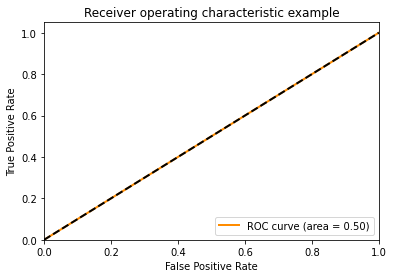

In [ ]:
### Compute ROC curve and ROC area for predictions on validation set
fpr, tpr, _ = roc_curve(y_test, pred_val)
roc_auc = auc(fpr, tpr)

### Plot
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='black', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# **GAUSSIAN NAIVE BAYES**

In [ ]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()

              precision    recall  f1-score   support

           0       0.73      0.88      0.80        58
           1       0.65      0.41      0.50        32

    accuracy                           0.71        90
   macro avg       0.69      0.64      0.65        90
weighted avg       0.70      0.71      0.69        90

Accuracy:  0.7111111111111111
f1-score: 0.5000000000000001
Precision score:  0.65
Recall score:  0.40625
MCC:  0.32879322937787064
Mean Squared Error: 0.5374838498865699
Mean Absolute Error: 0.5374838498865699


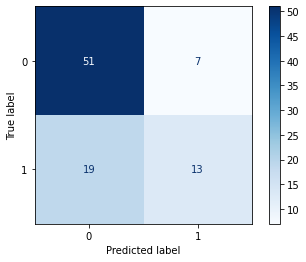

In [ ]:
GNB.fit(X_train,y_train)
y_pred = GNB.predict(X_test)

print(classification_report(y_test, y_pred))
print('Accuracy: ', accuracy_score(y_test,y_pred))
print('f1-score:', f1_score(y_test, y_pred))
print('Precision score: ', precision_score(y_test,y_pred))
print('Recall score: ', recall_score(y_test,y_pred))
print('MCC: ',matthews_corrcoef(y_test,y_pred) )
print('Mean Squared Error:', mean_squared_error(y_test, y_pred) ** 0.5)
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred) ** 0.5)
plot_confusion_matrix(GNB, X_test, y_test,cmap=plt.cm.Blues,)
plt.show()  



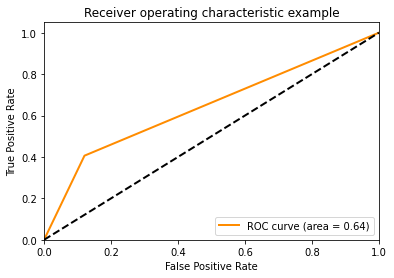

In [ ]:
### Compute ROC curve and ROC area for predictions on validation set
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

### Plot
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='black', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
# Create a Parameter grid
param_grid = {
 'max_depth' : range(4,20,2),
 'criterion' : ['gini','entropy']
}

dtree = DecisionTreeClassifier()
grid = GridSearchCV(dtree, param_grid,cv=5,  n_jobs = -1,return_train_score=True)

In [ ]:
grid.fit(X_train,y_train)
print('Best Criterion:', grid.best_estimator_.get_params()['criterion'])
print('Best max_depth:', grid.best_estimator_.get_params()['max_depth'])

Best Criterion: gini
Best max_depth: 4


              precision    recall  f1-score   support

           0       0.85      0.88      0.86        58
           1       0.77      0.72      0.74        32

    accuracy                           0.82        90
   macro avg       0.81      0.80      0.80        90
weighted avg       0.82      0.82      0.82        90

Accuracy:  0.8222222222222222
f1-score: 0.7419354838709677
Precision score:  0.7666666666666667
Recall score:  0.71875
MCC:  0.6072922519762168
Mean Squared Error: 0.4216370213557839
Mean Absolute Error: 0.4216370213557839


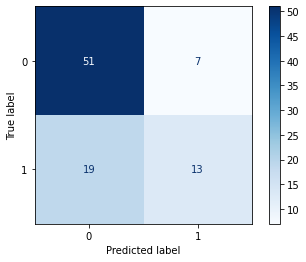

In [ ]:
best_grid = grid.best_estimator_
best_grid.fit(X_train,y_train)

y_pred = best_grid.predict(X_test)


print(classification_report(y_test, y_pred))
print('Accuracy: ', accuracy_score(y_test,y_pred))
print('f1-score:', f1_score(y_test, y_pred))
print('Precision score: ', precision_score(y_test,y_pred))
print('Recall score: ', recall_score(y_test,y_pred))
print('MCC: ',matthews_corrcoef(y_test,y_pred) )
print('Mean Squared Error:', mean_squared_error(y_test, y_pred) ** 0.5)
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred) ** 0.5)
plot_confusion_matrix(GNB, X_test, y_test,cmap=plt.cm.Blues,)
plt.show()  

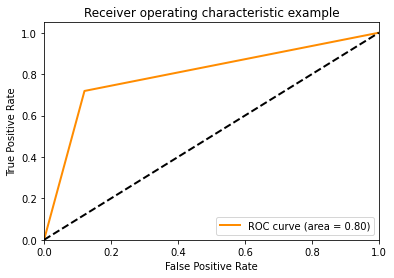

In [ ]:
### Compute ROC curve and ROC area for predictions on validation set
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

### Plot
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='black', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=42)

              precision    recall  f1-score   support

           0       0.83      0.91      0.87        58
           1       0.81      0.66      0.72        32

    accuracy                           0.82        90
   macro avg       0.82      0.79      0.80        90
weighted avg       0.82      0.82      0.82        90

Accuracy:  0.8222222222222222
f1-score: 0.7241379310344829
Precision score:  0.8076923076923077
Recall score:  0.65625
MCC:  0.602032616477754
Mean Squared Error: 0.4216370213557839
Mean Absolute Error: 0.4216370213557839


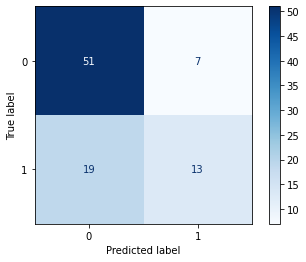

In [ ]:
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)


print(classification_report(y_test, y_pred))
print('Accuracy: ', accuracy_score(y_test,y_pred))
print('f1-score:', f1_score(y_test, y_pred))
print('Precision score: ', precision_score(y_test,y_pred))
print('Recall score: ', recall_score(y_test,y_pred))
print('MCC: ',matthews_corrcoef(y_test,y_pred) )
print('Mean Squared Error:', mean_squared_error(y_test, y_pred) ** 0.5)
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred) ** 0.5)
plot_confusion_matrix(GNB, X_test, y_test,cmap=plt.cm.Blues,)
plt.show()  
# from sklearn.model_selection import cross_val_score
# cross_val_score(RandomForestClassifier(),X_train, y_train, cv=5)

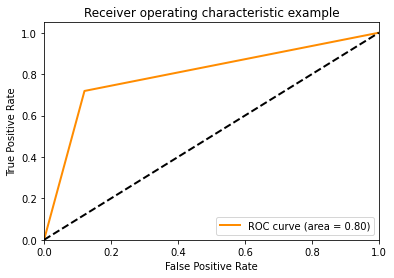

In [ ]:
### Compute ROC curve and ROC area for predictions on validation set
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

### Plot
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='black', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [100,150,200,250]
# Maximum number of levels in tree
max_depth = range(4,20,2)
# Minimum number of samples required at each leaf node
min_samples_leaf = [5, 200, 4]
max_features = [0.2,0.4,0.6,0.8]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_leaf': min_samples_leaf
               }

print(random_grid)

{'n_estimators': [100, 150, 200, 250], 'max_features': [0.2, 0.4, 0.6, 0.8], 'max_depth': range(4, 20, 2), 'min_samples_leaf': [5, 200, 4]}


In [ ]:

rfc_random = RandomizedSearchCV(estimator=rfc, param_distributions=random_grid,
                              n_iter = 100, scoring='f1', 
                              cv = 3, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
rfc_random.fit(X_train,y_train)
y_pred = rfc_random.predict(X_test)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   34.9s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.1min finished


              precision    recall  f1-score   support

           0       0.83      0.91      0.87        58
           1       0.81      0.66      0.72        32

    accuracy                           0.82        90
   macro avg       0.82      0.79      0.80        90
weighted avg       0.82      0.82      0.82        90

Accuracy:  0.8222222222222222
f1-score: 0.7241379310344829
Precision score:  0.8076923076923077
Recall score:  0.65625
MCC:  0.602032616477754
Mean Squared Error: 0.4216370213557839
Mean Absolute Error: 0.4216370213557839


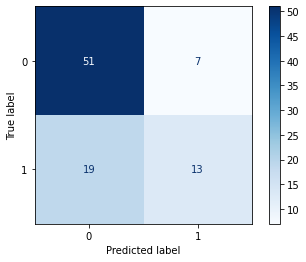

In [ ]:
print(classification_report(y_test, y_pred))
print('Accuracy: ', accuracy_score(y_test,y_pred))
print('f1-score:', f1_score(y_test, y_pred))
print('Precision score: ', precision_score(y_test,y_pred))
print('Recall score: ', recall_score(y_test,y_pred))
print('MCC: ',matthews_corrcoef(y_test,y_pred) )
print('Mean Squared Error:', mean_squared_error(y_test, y_pred) ** 0.5)
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred) ** 0.5)
plot_confusion_matrix(GNB, X_test, y_test,cmap=plt.cm.Blues,)
plt.show()  

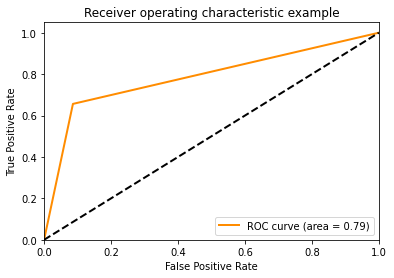

In [ ]:
### Compute ROC curve and ROC area for predictions on validation set
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

### Plot
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='black', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': range(4,20,2),
    'max_features': [0.6,0.5,0.7],
    'min_samples_leaf': [ 4, 5,6],
    'n_estimators': [50,100, 150]
}

# Create a base model


# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rfc, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2, return_train_score=True)
grid_search.fit(X_train, y_train);

Fitting 3 folds for each of 216 candidates, totalling 648 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done 312 tasks      | elapsed:   41.3s
[Parallel(n_jobs=-1)]: Done 648 out of 648 | elapsed:  1.4min finished


              precision    recall  f1-score   support

           0       0.83      0.93      0.88        58
           1       0.84      0.66      0.74        32

    accuracy                           0.83        90
   macro avg       0.84      0.79      0.81        90
weighted avg       0.83      0.83      0.83        90

Accuracy:  0.8333333333333334
f1-score: 0.736842105263158
Precision score:  0.84
Recall score:  0.65625
MCC:  0.6276403115978972
Mean Squared Error: 0.408248290463863
Mean Absolute Error: 0.408248290463863


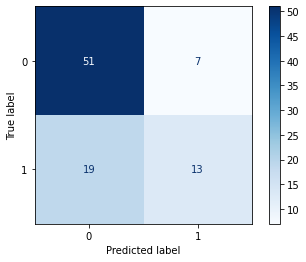

In [ ]:
y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred))
print('Accuracy: ', accuracy_score(y_test,y_pred))
print('f1-score:', f1_score(y_test, y_pred))
print('Precision score: ', precision_score(y_test,y_pred))
print('Recall score: ', recall_score(y_test,y_pred))
print('MCC: ',matthews_corrcoef(y_test,y_pred) )
print('Mean Squared Error:', mean_squared_error(y_test, y_pred) ** 0.5)
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred) ** 0.5)
plot_confusion_matrix(GNB, X_test, y_test,cmap=plt.cm.Blues,)
plt.show()  

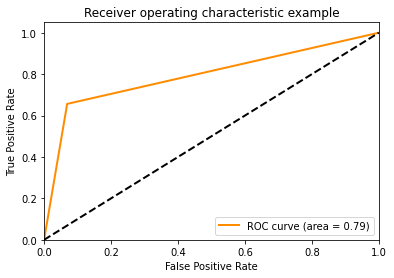

In [ ]:
### Compute ROC curve and ROC area for predictions on validation set
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

### Plot
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='black', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# **XG Boost**

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier(learning_rate = 0.05,random_state=42)


              precision    recall  f1-score   support

           0       0.83      0.90      0.86        58
           1       0.78      0.66      0.71        32

    accuracy                           0.81        90
   macro avg       0.80      0.78      0.79        90
weighted avg       0.81      0.81      0.81        90

Accuracy:  0.8111111111111111
f1-score: 0.711864406779661
Precision score:  0.7777777777777778
Recall score:  0.65625
MCC:  0.5774391401620893
Mean Squared Error: 0.4346134936801766
Mean Absolute Error: 0.4346134936801766


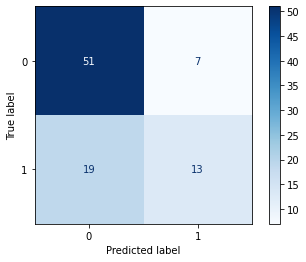

In [ ]:

xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)


print(classification_report(y_test, y_pred))
print('Accuracy: ', accuracy_score(y_test,y_pred))
print('f1-score:', f1_score(y_test, y_pred))
print('Precision score: ', precision_score(y_test,y_pred))
print('Recall score: ', recall_score(y_test,y_pred))
print('MCC: ',matthews_corrcoef(y_test,y_pred) )
print('Mean Squared Error:', mean_squared_error(y_test, y_pred) ** 0.5)
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred) ** 0.5)
plot_confusion_matrix(GNB, X_test, y_test,cmap=plt.cm.Blues,)
plt.show()

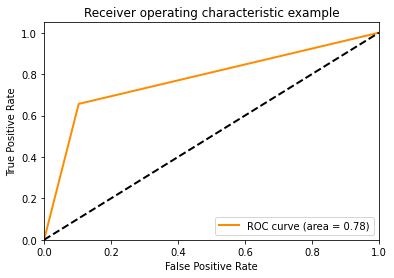

In [ ]:
### Compute ROC curve and ROC area for predictions on validation set
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

### Plot
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='black', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [ ]:
features_imp = pd.DataFrame({'feature': X_train.columns, 'importance': xgb.feature_importances_}).sort_values(by='importance', ascending=False)
features_imp = features_imp.reset_index()
features_imp[features_imp.importance > 0.05]

,index,feature,importance
0,11,time,0.306842
1,7,serum_creatinine,0.129330
2,4,ejection_fraction,0.091477
3,0,age,0.085459
4,8,serum_sodium,0.070658
5,9,sex,0.069536
6,6,platelets,0.057619
7,3,diabetes,0.053278
8,1,anaemia,0.050776


In [ ]:
X_train_imp_xgb = X_train[features_imp[features_imp.importance > 0.05].feature]
X_test_imp_xgb = X_test[features_imp[features_imp.importance > 0.05].feature]

              precision    recall  f1-score   support

           0       0.83      0.91      0.87        58
           1       0.81      0.66      0.72        32

    accuracy                           0.82        90
   macro avg       0.82      0.79      0.80        90
weighted avg       0.82      0.82      0.82        90

Accuracy:  0.8222222222222222
f1-score: 0.7241379310344829
Precision score:  0.8076923076923077
Recall score:  0.65625
MCC:  0.602032616477754
Mean Squared Error: 0.4216370213557839
Mean Absolute Error: 0.4216370213557839


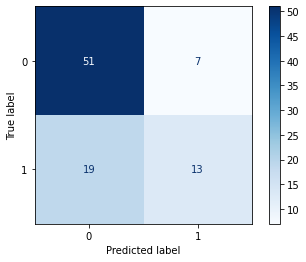

In [ ]:
xgb.fit(X_train_imp_xgb,y_train)
y_pred = xgb.predict(X_test_imp_xgb)


print(classification_report(y_test, y_pred))
print('Accuracy: ', accuracy_score(y_test,y_pred))
print('f1-score:', f1_score(y_test, y_pred))
print('Precision score: ', precision_score(y_test,y_pred))
print('Recall score: ', recall_score(y_test,y_pred))
print('MCC: ',matthews_corrcoef(y_test,y_pred) )
print('Mean Squared Error:', mean_squared_error(y_test, y_pred) ** 0.5)
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred) ** 0.5)
plot_confusion_matrix(GNB, X_test, y_test,cmap=plt.cm.Blues,)
plt.show()

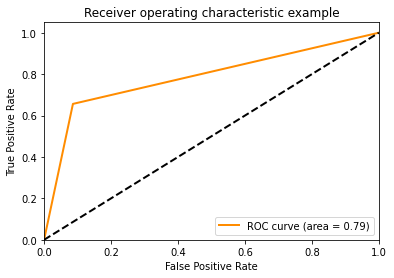

In [ ]:
### Compute ROC curve and ROC area for predictions on validation set
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

### Plot
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='black', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# **Stochastic gradient descent**

In [ ]:
from sklearn.model_selection import ParameterGrid
from sklearn.linear_model import SGDClassifier

loss = ['hinge', 'log', 'modified_huber', 'squared_hinge',  'perceptron'] 
penalty = ['l1', 'l2', 'elasticnet'] 
alpha = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000] 
learning_rate = ['constant', 'optimal', 'invscaling', 'adaptive'] 
eta0 = [1, 10, 100,150] 
param_distributions = dict(loss=loss, penalty=penalty, alpha=alpha, learning_rate=learning_rate, eta0=eta0) 


sgd = SGDClassifier(random_state=42) 

randomSGD = RandomizedSearchCV(estimator=sgd, 
param_distributions=param_distributions, 
scoring='f1', 
verbose=1, n_jobs=-1, 
n_iter=1000) 

randomSGD_result = randomSGD.fit(X_train, y_train) 



Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 956 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed:   23.7s finished


Best Score:  0.6104136604136605
Best Params:  {'penalty': 'elasticnet', 'loss': 'log', 'learning_rate': 'adaptive', 'eta0': 150, 'alpha': 10}
              precision    recall  f1-score   support

           0       0.79      0.95      0.86        58
           1       0.85      0.53      0.65        32

    accuracy                           0.80        90
   macro avg       0.82      0.74      0.76        90
weighted avg       0.81      0.80      0.79        90

Accuracy:  0.8
f1-score: 0.6538461538461537
Precision score:  0.85
Recall score:  0.53125
MCC:  0.5521244795213299
Mean Squared Error: 0.4472135954999579
Mean Absolute Error: 0.4472135954999579


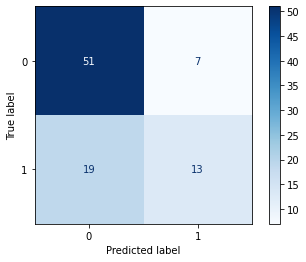

In [ ]:
print('Best Score: ', randomSGD_result.best_score_) 
print('Best Params: ', randomSGD_result.best_params_) 
y_pred = randomSGD.predict(X_test)

print(classification_report(y_test, y_pred))
print('Accuracy: ', accuracy_score(y_test,y_pred))
print('f1-score:', f1_score(y_test, y_pred))
print('Precision score: ', precision_score(y_test,y_pred))
print('Recall score: ', recall_score(y_test,y_pred))
print('MCC: ',matthews_corrcoef(y_test,y_pred) )
print('Mean Squared Error:', mean_squared_error(y_test, y_pred) ** 0.5)
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred) ** 0.5)
plot_confusion_matrix(GNB, X_test, y_test,cmap=plt.cm.Blues,)
plt.show()

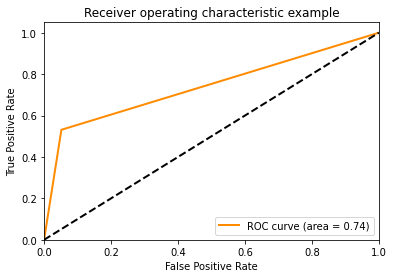

In [ ]:
### Compute ROC curve and ROC area for predictions on validation set
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

### Plot
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='black', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()